# Linear Regression 
Attempts to establish how X causes Y 

# Correlation vs Linear Regression 

## similarities 
quantify the direction and strength of the relationship 

## Differences
Correlation is a single statistics
Linear regression produces an equation 


In [4]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression 
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


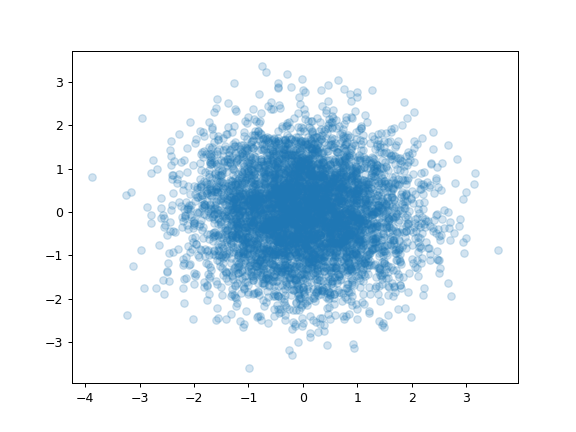

In [5]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax=plt.subplots()
ax.scatter(X,Y,alpha=.2)

In [9]:
tickers = ['AAPL','IBM','MSFT','^GSPC']
start = dt.datetime(2021,1,1)
end = dt.datetime(2022,1,1)
data = pdr.get_data_yahoo(tickers,start,end)

In [11]:
data = data['Adj Close']

In [12]:
data.head()

Symbols,AAPL,IBM,MSFT,^GSPC
Date,,,,
2021-01-04,128.453461,111.285995,215.434982,3700.649902
2021-01-05,130.041626,113.261375,215.642776,3726.860107
2021-01-06,125.664207,116.089767,210.051315,3748.139893
2021-01-07,129.952271,115.820404,216.028732,3803.790039
2021-01-08,131.073929,115.407372,217.344986,3824.679932


In [13]:
log_returns = np.log(data/data.shift())

In [14]:
log_returns

Symbols,AAPL,IBM,MSFT,^GSPC
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012288,0.017595,0.000964,0.007058
2021-01-06,-0.034241,0.024666,-0.026271,0.005694
2021-01-07,0.033554,-0.002323,0.028060,0.014738
2021-01-08,0.008594,-0.003573,0.006074,0.005477
...,...,...,...,...
2021-12-27,0.022715,0.007550,0.022921,0.013744
2021-12-28,-0.005784,0.007644,-0.003510,-0.001011
2021-12-29,0.000502,0.005414,0.002049,0.001401


In [27]:

def linear_regression(ticker_a, ticker_b):

    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1,1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1,1)

    lin_regr = LinearRegression()
    lin_regr.fit(X,Y)

    Y_pred = lin_regr.predict(X)
    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0,0]

    fig, ax=plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X,Y)
    ax.plot(X, Y_pred, c='r')


In [25]:
alpha, beta

(0.0005512230009329583, 0.35556858327722535)

<IPython.core.display.Javascript object>


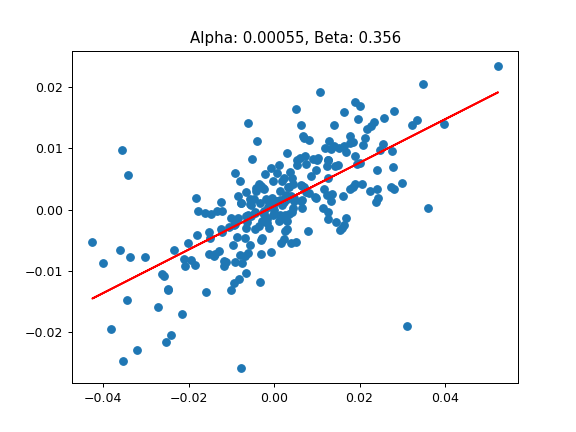

In [28]:
linear_regression("AAPL","^GSPC")

<IPython.core.display.Javascript object>


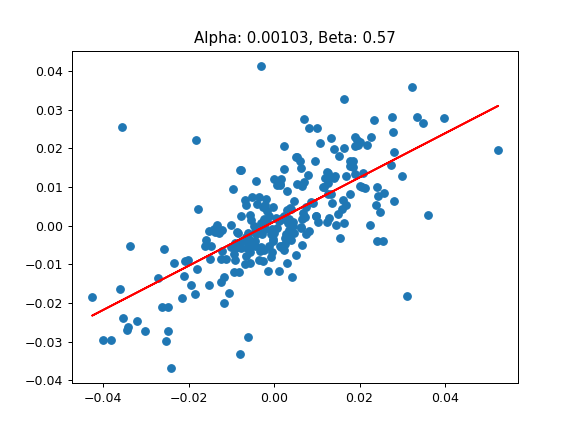

In [29]:
linear_regression("AAPL","MSFT")

<IPython.core.display.Javascript object>


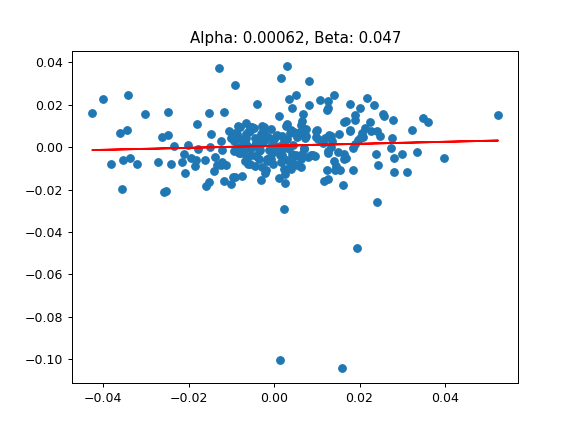

In [31]:
linear_regression("AAPL","IBM")